In [64]:
%pylab inline
import numpy as np
import pylab

Populating the interactive namespace from numpy and matplotlib


In [54]:
def transform(c, dtype=np.float64):
    c = np.asarray(c, dtype=dtype)
    b = np.zeros(c.shape, dtype=dtype)
    b[0] = 1. / c[0]
    for i in range(1, len(c)):
        for j in range(i):
            b[i] -= b[j] * c[i - j] / c[0]
    return b

c = np.asarray(np.random.rand(5))
assert np.allclose(transform(transform(c)), c)

print transform([1, -.5, 1./6, -1./24])
#  [1., .5, 0.08333333333333333, 0.]

[  1.00000000e+00   5.00000000e-01   8.33333333e-02   6.93889390e-18]


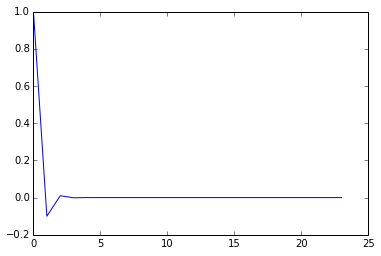

In [81]:
pylab.figure()
pylab.plot(transform([1, -.5, 1./6, -1./24, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
pylab.show()

In [121]:
import nengolib

order = 10
tau = 0.1
dt = 0.001

v = np.zeros(order)
v[0] = 1.0
v[1] = tau
v[2] = tau**2
D1 = np.asarray(v)
D2 = transform(D1)

print np.polymul(D1, D2)

#H = nengolib.signal.LinearSystem((1.0, D1))
#Hinv = nengolib.signal.LinearSystem((1.0, D2))

[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e-10   1.00000000e-11
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


In [210]:
c = [1, -.5, 1./6, -1./24]
b = transform(c)

def transform_pade(c):
    from scipy import misc
    return np.asarray(misc.pade(c, len(c)-1)[1])[::-1] / c[0]

assert np.allclose(transform_pade(c), transform(c))

In [212]:
c = [1, -.5, 1./6, -1./24]

def H_transform(c):
    from nengolib.signal import LinearSystem
    num = np.zeros(len(c))
    num[0] = 1.0
    return LinearSystem((num, c), analog=False)

delta = np.zeros(len(c))
delta[0] = 1.0
assert np.allclose(H_transform(c).filt(delta, dt=0), transform(c))

In [208]:
print H_transform(H_transform(c).filt(u, dt=0)).filt(u, dt=0)
print c

[ 1.         -0.5         0.16666667 -0.04166667]
[1, -0.5, 0.16666666666666666, -0.041666666666666664]


c:\users\aaron\ctn\nengolib\nengolib\signal\system.py:210: UserWarning: Synapse (([ 1.  0.  0.  0.], [  1.00000000e+00   5.00000000e-01   8.33333333e-02   6.93889390e-18], False)) has extra delay due to passthrough (https://github.com/nengo/nengo/issues/938)
  "(https://github.com/nengo/nengo/issues/938)" % sys)


In [221]:
p = np.asarray(np.random.rand(20))
print sorted(abs(np.roots(p)))
print sorted(abs(1.0 / np.roots(transform(p))))


[0.1938325211101791, 0.93214179561591359, 0.93214179561591359, 0.94975303173141779, 0.94975303173141779, 0.99332201984021806, 0.99332201984021806, 0.99468639865864661, 0.99468639865864661, 1.0283437292089279, 1.0283437292089279, 1.068138140287908, 1.068138140287908, 1.0851537834066283, 1.0851537834066283, 1.1604122063260078, 1.1604122063260078, 1.2235901667754197, 1.2235901667754197]
[0.81585112293219486, 0.82073600916974077, 0.82073600916974077, 0.85146393508534268, 0.85146393508534268, 0.85506420625787094, 0.85506420625787094, 0.86313374092909778, 0.86313374092909778, 0.89387627078281762, 0.89387627078281762, 0.89427061405695119, 0.89427061405695119, 0.93329404738784127, 0.93329404738784127, 0.93537705062386989, 0.93537705062386989, 0.99396397656608892, 0.99396397656608892]
